In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,Embedding,MaxPooling1D
from tensorflow.keras.models import Model

In [0]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-05-11 10:37:48--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-05-11 10:37:48 (15.4 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.columns = ['labels','data']
df['b_labels'] = df['labels'].map({'ham':0, 'spam': 1})
Y = df['b_labels'].values
#split up the data
df_train,df_test,Ytrain,Ytest = train_test_split(df['data'],Y,test_size=0.33)


In [0]:
#Convert sentences to sequences

MAX_VOCABS_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCABS_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [0]:
#get word => integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7212 unique tokens.


In [0]:
#pad sequence to get n*t matrix

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

#get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [0]:
data_test = pad_sequences(sequences_test)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 155)


In [0]:
#creating the model

D = 20 #Choosing embedding of dimensionality

i = Input(shape=(T,))
x = Embedding(V+1,D)(i) 
#giving V+1 coz index is given more in python eg 99 index is 100
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

In [0]:
#compile

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test,Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 19ms/step - loss: 0.3815 - accuracy: 0.8636 - val_loss: 0.2936 - val_accuracy: 0.8575
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.1245 - accuracy: 0.9510 - val_loss: 0.0997 - val_accuracy: 0.9782
Epoch 3/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0296 - accuracy: 0.9890 - val_loss: 0.0755 - val_accuracy: 0.9853
Epoch 4/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0671 - val_accuracy: 0.9864
Epoch 5/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0585 - val_accuracy: 0.9853
Epoch 6/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0569 - val_accuracy: 0.9853
Epoch 7/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0564 - va

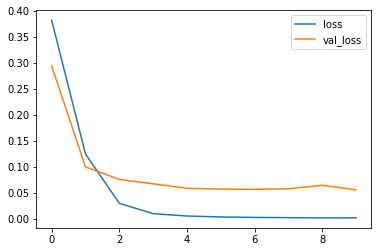

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

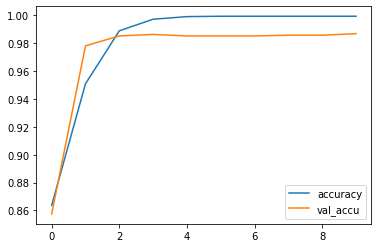

In [0]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accu')
plt.legend()